In [120]:
import numpy as np
import scipy.signal as sig
import soundfile as sf
from matplotlib import pyplot as plt
import IPython.display as ipd

In [33]:
def ffdelay(delay, g, b0, fs, input):
    '''
    function that implements a feed-forward comb filter
    delay: amount of delay specified in seconds
    g: gain coefficient for the input to the delay line
    b0: gain coefficient for direct sound
    fs: sample rate
    input: array holding a monophonic audio signal 

    output: monophonic array holding a combination of the
        input scaled by b0, plus the delayed output scaled
        by g as it is input into the delay buffer.
        Note: in our implementation, output has the same
        dimensions as the input, so you may want to zero
        pad your input to see the full delayed output.
    '''

    output = np.zeros(np.shape(input)) # allocate output array

    # TODO: allocate array for delay line
    M = int(delay*fs)
    delay_line = np.zeros(M)
    # TODO: create read/write pointers into the buffer
    pointer = 0

    for i in np.arange(0,np.size(output)):
        output[i] = b0*input[i] + g*delay_line[pointer]
        delay_line[pointer] = input[i]
        pointer = (pointer + 1) % M


        # TODO: read/write data into delay line and increment pointers 


    return output

[1.  0.  0.  0.  0.  0.5]
[-0.87055056 -0.26901492 -0.26901492  0.7042902   0.7042902 ] [ 0.          0.82794279 -0.82794279  0.51169678 -0.51169678]
[ 1.   0.   0.   0.   0.  -0.8]
[-0.77370542 -0.77370542  0.29552918  0.29552918  0.9563525 ] [ 0.5621299  -0.5621299   0.90954528 -0.90954528  0.        ]


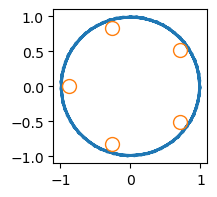

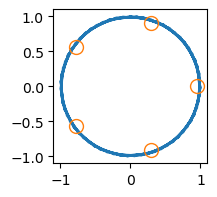

In [34]:
#Plotting unit circles
M = 6
g = 0.5 
b = np.zeros(M)
b[0] = 1
b[np.size(b)-1] = g

print(b)

z = np.roots(b)

print(np.real(z), np.imag(z))

plt.figure(figsize=(8, 2))
plt.subplot(1,3,1) # plot zeros 

circM = 100
circx = np.sin(2*np.pi*np.linspace(0, 2*np.pi, circM))
circy = np.cos(2*np.pi*np.linspace(0, 2*np.pi, circM))
plt.plot(circx,circy)
plt.axis('square')
plt.plot(np.real(z), np.imag(z), 'o', fillstyle="none", ms=10)

M = 6
g = -0.8 
b = np.zeros(M)
b[0] = 1
b[np.size(b)-1] = g

print(b)

z = np.roots(b)

print(np.real(z), np.imag(z))

plt.figure(figsize=(8, 2))
plt.subplot(1,3,1) # plot zeros 

circM = 100
circx = np.sin(2*np.pi*np.linspace(0, 2*np.pi, circM))
circy = np.cos(2*np.pi*np.linspace(0, 2*np.pi, circM))
plt.plot(circx,circy)
plt.axis('square')
plt.plot(np.real(z), np.imag(z), 'o', fillstyle="none", ms=10)

In [116]:
def improved_ffdelay(delay, g, b0, fs, input):
    '''
    function that implements a feed-forward comb filter
    delay: amount of delay specified in seconds
    g: gain coefficient for the input to the delay line
    b0: gain coefficient for direct sound
    fs: sample rate
    input: array holding a monophonic audio signal 

    output: monophonic array holding a combination of the
        input scaled by b0, plus the delayed output scaled
        by g as it is input into the delay buffer.
        Note: in our implementation, output has the same
        dimensions as the input, so you may want to zero
        pad your input to see the full delayed output.
    '''

    output = np.zeros(np.shape(input)) # allocate output array

    # TODO: allocate array for delay line
    M = int(delay*fs)
    delay_line = np.zeros(M)
    # TODO: create read/write pointers into the buffer
    pointer = 0

    for i in np.arange(0,np.size(output)):
        frac = delay*fs - M
        output[i] = delay_line[pointer]*frac + delay_line[(pointer + 1)%M]*(1-frac)
        delay_line[pointer] = input[i]
        pointer = (pointer + 1) % M


        # TODO: read/write data into delay line and increment pointers 


    return output

In [52]:
def fbdelay(delay, g, b0, fs, input):
    '''
    function that implements a feedback comb filter
    delay: amount of delay specified in seconds
    g: gain coefficient for the input to the delay line
    b0: gain coefficient for direct sound
    fs: sample rate
    input: array holding a monophonic audio signal 

    output: monophonic array holding a combination of the
        input scaled by b0, plus the delayed output scaled
        by g as it is input into the delay buffer.
        Note: in our implementation, output has the same
        dimensions as the input, so you may want to zero
        pad your input to see the full delayed output.
    '''

    output = np.zeros(np.shape(input)) # allocate output array

    # TODO: allocate array for delay line
    M = int(delay*fs)
    delay_line = np.zeros(M)
    # TODO: create read/write pointers into the buffer
    pointer = 0

    for i in np.arange(0,np.size(output)):
        output[i] = b0*input[i] + g*delay_line[pointer]
        delay_line[pointer] = output[i]
        pointer = (pointer + 1) % M
        # TODO: read/write data into delay line and increment pointers 


    return output

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


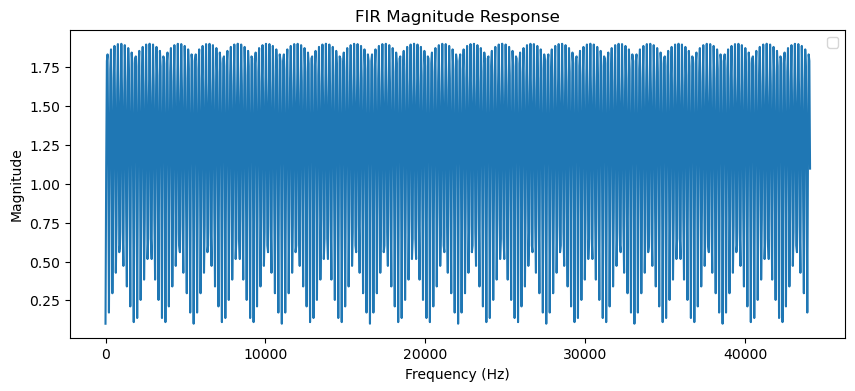

In [122]:
#magnitude response of FIR comb filter
from scipy.fft import fft
fs = 44100 
M = 200
g = -0.9
b0 = 1.0
delay = M/fs
input = np.zeros(1024)
input[0] = 1.0

ffdelay_output = ffdelay(delay, g, b0, fs, input)
ffdelay_magnitude = np.abs(fft(ffdelay_output))
frequencies = np.linspace(0, fs, len(ffdelay_magnitude), endpoint = False)

plt.figure(figsize=(10, 4))
plt.plot(frequencies, ffdelay_magnitude)
plt.title('FIR Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


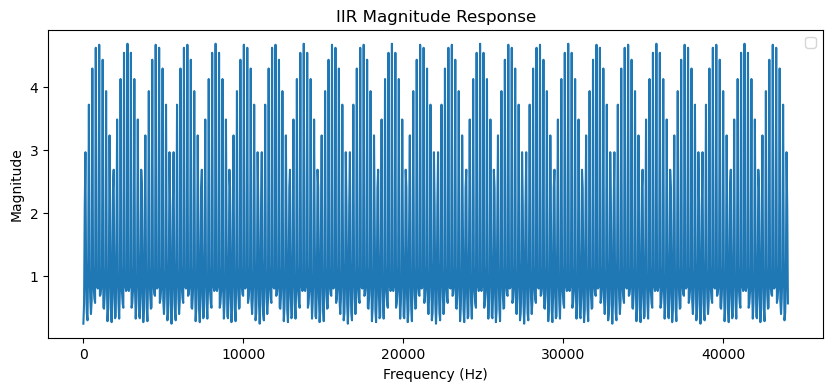

In [123]:
#magnitude response of IIR comb filter
from scipy.fft import fft
fs = 44100 
M = 200
g = -0.9
b0 = 1.0
delay = M/fs
input = np.zeros(1024)
input[0] = 1.0

fbdelay_output = fbdelay(delay, g, b0, fs, input)
fbdelay_magnitude = np.abs(fft(fbdelay_output))
frequencies = np.linspace(0, fs, len(fbdelay_magnitude), endpoint = False)

plt.figure(figsize=(10, 4))
plt.title('IIR Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.plot(frequencies, fbdelay_magnitude)
plt.legend()

In [89]:
#creating a musical scale
input = 0.1*np.random.randn(44100)
scale_frequencies = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]

filtered_audio = np.zeros_like(input)
for freq in scale_frequencies:
    delay = 1 / freq 
    filtered_audio += fbdelay(delay, 0.5, 1, 44100, input)

from IPython.display import Audio
Audio(filtered_audio, rate = 44100)


In [110]:
#testing filter on white noise
import soundfile as sf
input = 0.1*np.random.randn(44100) 
output = ffdelay(0.0009, -0.6, 1, 44100, input)
Audio(output, rate = fs)

In [106]:
#testing filter on gtr.wav file
import soundfile as sf
input, fs = sf.read(r"C:\Users\Devyani Hebbar\Downloads\MPATE2607_hw2_ipynb\MPATE2607_hw2_ipynb\gtr.wav")  
output = ffdelay(0.09, 0.5, 1, 44100, input)
Audio(output, rate = fs)

In [119]:
#testing filter on gtr.wav file
import soundfile as sf
input, fs = sf.read(r"C:\Users\Devyani Hebbar\Downloads\MPATE2607_hw2_ipynb\MPATE2607_hw2_ipynb\gtr.wav")  
output = improved_ffdelay(0.6, 0.5, 1, 44100, input)
Audio(output, rate = fs)

In [111]:
#testing filter on gtr.wav file
import soundfile as sf
input, fs = sf.read(r"C:\Users\Devyani Hebbar\Downloads\MPATE2607_hw2_ipynb\MPATE2607_hw2_ipynb\gtr.wav")  
output = fbdelay(0.09, 0.5, 1, 44100, input)
Audio(output, rate = fs)

In [104]:
#testing filter on another wav file
input, fs = sf.read(r"C:\Users\Devyani Hebbar\Downloads\falling meteor.wav")  
output = improved_ffdelay(0.01, 0.5, 1, 44100, input)
Audio(output, rate = fs)

ValueError: setting an array element with a sequence.

In [ ]:
def modDelay(lfo_freq, lfo_depth, dry, wet, fs, input):
    '''
    function that implements a modulated delay effect
    lfo_freq: the frequency of the low frequency oscillator
    lfo_depth: the amplitude of the low frequency oscillator
    dry: amplitude of the dry, unprocessed signal
    wet: amplitude of the wet, processed signal
    fs: sample rate
    input: array holding a monophonic audio signal 

    output: monophonic array holding a LFO modulated version of the input
    '''

    output = np.zeros(np.shape(input)) # allocate output array

    # TODO: allocate array for delay line
    # TODO: create read/write pointers into the buffer

    # variable to hold the phase of the LFO
    lfo_phi = 0


    for i in np.arange(0,np.size(output)):
        # TODO: implement LFO
        # TODO: update output of LFO to update position of read pointer
        # TODO: read/write data into delay line and increment pointers 

        output[i] = input[i]

    return output